In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [2]:
TCareAgg_df = pd.read_csv("CleanedData/USPop.csv")
SumCareAgg10 = TCareAgg_df[["State_Name","Y2010","Code","Item"]]
SumCareAgg10["Year"] = "2010"
SumCareAgg10 = SumCareAgg10.rename(columns={'Y2010':'Population'})
SumCareAgg11 = TCareAgg_df[["State_Name","Y2011","Code","Item"]]
SumCareAgg11["Year"] = "2011"
SumCareAgg11 = SumCareAgg11.rename(columns={'Y2011':'Population'})
SumCareAgg12 = TCareAgg_df[["State_Name","Y2012","Code","Item"]]
SumCareAgg12["Year"] = "2012"
SumCareAgg12 = SumCareAgg12.rename(columns={'Y2012':'Population'})
SumCareAgg13 = TCareAgg_df[["State_Name","Y2013","Code","Item"]]
SumCareAgg13["Year"] = "2013"
SumCareAgg13 = SumCareAgg13.rename(columns={'Y2013':'Population'})
SumCareAgg14 = TCareAgg_df[["State_Name","Y2014","Code","Item"]]
SumCareAgg14["Year"] = "2014"
SumCareAgg14 = SumCareAgg14.rename(columns={'Y2014':'Population'})
SumCareAgg15 = TCareAgg_df[["State_Name","Y2015","Code","Item"]]
SumCareAgg15["Year"] = "2015"
SumCareAgg15 = SumCareAgg15.rename(columns={'Y2015':'Population'})
SumCareAgg16 = TCareAgg_df[["State_Name","Y2016","Code","Item"]]
SumCareAgg16["Year"] = "2016"
SumCareAgg16 = SumCareAgg16.rename(columns={'Y2016':'Population'})
SumCareAgg17 = TCareAgg_df[["State_Name","Y2017","Code","Item"]]
SumCareAgg17["Year"] = "2017"
SumCareAgg17 = SumCareAgg17.rename(columns={'Y2017':'Population'})
NewCareAgg = pd.concat([SumCareAgg10,SumCareAgg11,SumCareAgg12,SumCareAgg13,SumCareAgg14,SumCareAgg15,SumCareAgg16,SumCareAgg17])
NewCareAgg.to_csv("CleanedData/USPopTall.csv")

/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1510/3994408901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg10["Year"] = "2010"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1510/3994408901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SumCareAgg11["Year"] = "2011"
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1510/3994408901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [2]:
#import the neccesary dataframes
Deathdf = pd.read_csv("CensusData/DeathRate.csv")
Spendingdf = pd.read_csv("CleanedData/MedicareAggregateTall.csv")
Popdf = pd.read_csv("CleanedData/USPopTall.csv")


# Comparison of Spending and Mortality Rate

In [3]:
#Select necessary columns and combine on State (Death and Aggregate)
Popdf = Popdf[['Year','State_Name','Population']]
Popdf = Popdf.rename(columns = {'State_Name':'State'})
Mortatlitydf = pd.merge(Deathdf,Popdf,how = 'inner',on=['State','Year'])
Mortatlitydf['Population'] = Mortatlitydf['Population']*1000
Mortatlitydf['Mortality Rate']= round((Mortatlitydf['Deaths']/Mortatlitydf['Population'])*100,2)
Spendingdf = Spendingdf.sort_values(by=['Year','State_Name'])
Mortatlitydf = Mortatlitydf.sort_values(by = ['Year','State'])
SumSpenddf = Spendingdf.groupby(['Year','State_Name'])
SumSpenddf = SumSpenddf.sum()


The r^2-value is: 0.008442357931299401


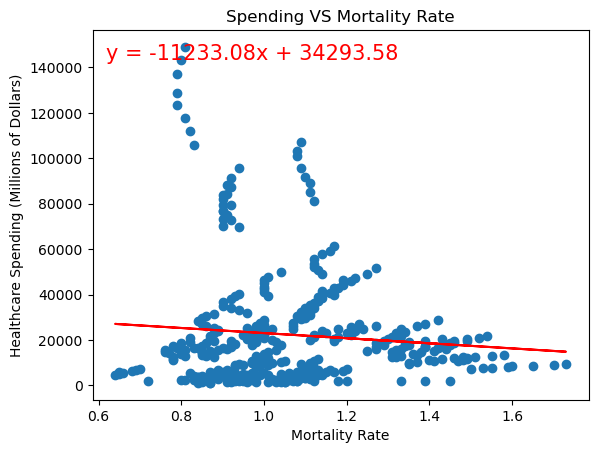

In [4]:
#create the graphs
#Define ScatPlotandReg creates a scatter plot with a linear Regression show as well as an Rsquared value
#Inputs: takes 2 data series, your x and y coordinates, labels for  the axises and a title
#Output shows and saves a scatterplot
ScatPlotandReg(Mortatlitydf['Mortality Rate'],SumSpenddf['Cost'],"Mortality Rate","Healthcare Spending (Millions of Dollars)","Spending VS Mortality Rate","SpendingVSMortality")

** Analysis of Spending and Mortality Rate ** : There is no correlation between state spending and mortality rate